**Sign Language Digits Dataset**

Datada 0-9 arası rakamların işaret dili görselleri bulunmaktadır.

Bu durumda 10 unique class vardır.

Başlangıçta basitlik olması açısından 0 ve 1 kullanılacaktır.

Datada 204 ile 408 indeksleri arasındaki sample'lar 0, 

822 ile 1027 arasındaki sample'lar 1 classına aittir

Datada her bir classa ait 205 sample bulunmaktadır.

Data numpy kütüphanesinde numpy matrix formatında depolandığından .npy formatındadır. 

Görseller 64x64 piksel boyutundadır. Böylelikle her bir görselde 4096 tane piksel olduğu anlaşılır.

Bu pikseller 0 ve 1 arasında değere sahiptir. Piksellerin rengi koyulaştıkça 1'e daha yakın değerde olduğu düşünülebilir.

# **Deep Learning**

Deep learning featureları direkt datadan öğrenen machine learning tekniklerinden bir tanesidir.

**Machine learningde datadaki featurelardan bir model oluşturulurken, deep learningde direkt datadan bir model oluşturulur.**

Data miktarı arttığında machine learning teknikleri performans açısından yetersiz kalmaktadır. Bu durumda deep learning, accuracy gibi metriklerde daha iyi performans sunmaktadır. Bu yüzden data miktarı arttığında deep learning tercih edilmektedir.

Şu anda 1 milyon sample'a sahip datalara barındırdığı data miktarı yüksek denilebilir.

Deep learning siri gibi konuşma tanıma (speech recognition) uygulamaları, görsel sınıflandırma (image classification), natural language procession ve recommendation systems gibi alanlarda kullanılır.

**Deep learning'in machine learning'den farkı şu şekildedir;**

*   Deep learning machine learning'in bir alt kümesidir. Yani machine learning deep learning'i kapsar.
*   Machine learning'de dataki featurelardan model oluşturulur. Yani model oluşturulmadan önce önemli featurelar algoritmaya verilmelidir(feature extraction).
*   Deep learning'de featurelar datadan direkt öğrenilir. Deep learning algoritması önemli olan featureları kendi kendine çıkarır , feature extraction işlemini kendi yapar.

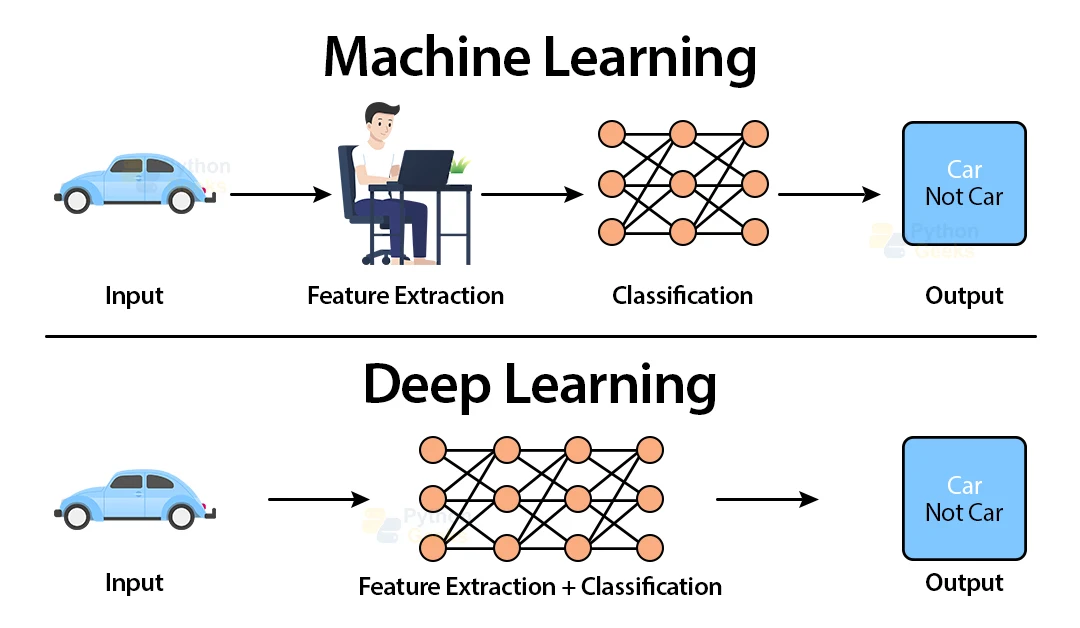

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


X görsellerden oluşan bir array.

Y ise görsellerin classlarından oluşan bir arraydır.

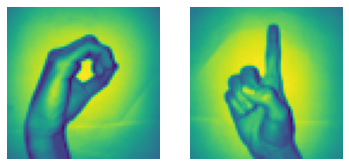

In [ ]:
x_l = np.load('/content/drive/MyDrive/data/X.npy')
Y_l = np.load('/content/drive/MyDrive/data/Y.npy')
img_size = 64 
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

image size 64 olarak datada verilmişti. Her bir görselde 4096 tane piksel vardır. Bu pikseller imshow parametresi ile görselleştirilir.

subplot methoduyla iki görsel bir arada çizdirilmiştir.

reshape methoduyla datadaki görsel 64x64 boyutuna getirilir.

Datanın 260. ve 900. indekslerindeki görseller çizdirilmiştir.

Plot çizdirilirken normalde x ve y eksenleri de olur. axis('off') ile plot edilirken eksenler gözükmez.



In [ ]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


Görseller kullanılacak modellere öğretilmek için numpy array'e çevrilir.

Datada 204-409 indekslerinde 0 görseli, 822-1027 indekslerinde 1 görseli bulunmaktadır.

0 ve 1 görselleri kullanılacağından bu görseller seçilerek filtreleme yapılmıştır.

Y labelı 0 ve 1'lerden oluşan bir arraydir.

Datada her bir görsel için 205 sample bulunduğundan 0 ve 1'lerden oluşan 1x205 boyutunda arrayler oluşturulup, bu arrayler birleştirilip y labelı oluşturulmuştur.

X featurenın shape'i (410, 64, 64)'tir.

Her bir class için 205 sample bulunduğundan ve 0 ve 1 classları kullanılacağından 410'dur.

Datadaki görseller 64x64 boyutunda bir matrixten oluştuğundan 64,64 yazar.

Y labelında ise her bir değer için bir satır ayrılır. Bu yüzden satır boyutu 410, label tek bir sütundan oluştuğundan sütun sayısı 1'dir.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Datada eğitilirken %75'i training, %15'i testing için kullanılacaktır.

random_state parametresiyle kod her çalıştırıldığında aynı training datası kullanılır. Yani her seferinde datayı aynı randomlıkta böler. Eğer bu parametre kullanılmazsa kod her çalıştırıldığında datanın farklı bir bölümü training için ayrılacaktır ve accuracy değeri değişecektir. 

Train ve test sample sayısına bakmak için bir değişkene eşitlenirler.


x train'in boyutu (348,64,64)'tür. Bunu deep learning modelinde kullanmak için 2 boyutlu hale getirilmelidir.

Görselin iki eksenindeki piksel sayısı da 64'tür. Bu eksen boyutları birleştirildiğinde 64x64 = 4096 boyutunda olur.

In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


(348,64,64) 

348 -> 0. indeks

64 -> 1.indeks

64 -> 2.indeks

Görselin bir ekseninde 64 piksel vardır ve bu 1. indekstedir. Diğer ekseninde de 64 piksel vardır ve bu 2. indekstedir. Bu yüzden 1. ve 2. indeksler çarpılır.

Burada ayrıca train datasında 348 sample, test datasında 62 sample olduğu görülür.

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Train ve test datalarının transpose'u alınır. Böylelikle her bir feature bir satırda bulunmuş olur.

weight değerleri ile feature değerleri çarpılacağından matrix çarpımında 1. değerin column sayısı ile ikinci değerin row sayısı aynı olmalıdır.

weight shape (0.01,4096) -> her bir feature için bir weight değeri

x_train shape (4096,348)

(0.01,4096) * (4096,348) şu durumda matrix çarpımı için uygundur.

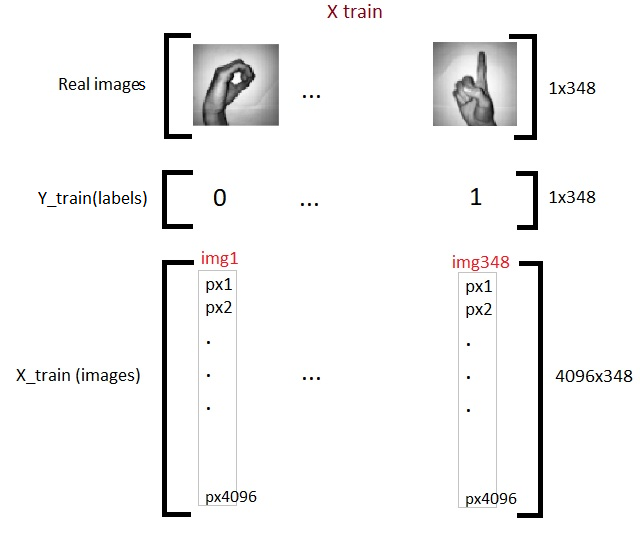

Train datasında 348 adet 0 ve 1'lerden oluşan görseller bulunmaktadır.

Bu görseller yan yana dizildiğinde tek bir satırdan oluşan 1x348 boyutunda bir array oluşmuştur.

y train label'ı 0 ve 1'lerden oluşur. Transpose almadan önce yukarıdan aşağı şekilde sıralanmıştı. Transpose alındığında yan yana geldiğinden 1x348 boyutunda bir array oluşmuştur.

x train'in transpose'u alınmadan önce shape'i (348,4096)'ydı. Yani pikseller sütunda, görseller satırdaydı. Transpose alındığında pikseller satıra, görseller sütuna geçmiş oldu. Her bir piksel yani her bir feature bir satırda bulunmuş oldu.

Piksellerin 0-1 arasında bir matematiksel değeri vardır.

Array'in içerisine piksellerin matematiksel değeri yazılır.

Asıl görsellerin shape'i (1,348) , x_train shape'i (4096,348)'dir. İki boyutlu görseller tek boyutlu vektör haline getirilmiştir.

Görseller deep learning modelinde kullanılabilmek için pikseller sırayla dizilmiştir.